In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [49]:
df = pd.read_csv("player_data_selected.csv")

C:\Users\katha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (62,63,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
df.head()

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,...,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
0,0,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,...,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
1,1,2008,Kaká,25,90,91,Milan,138449,182.9,161,...,68,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
2,2,2008,Diego,22,88,90,SV Werder Bremen,136138,172.7,161,...,67,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
3,3,2008,S. Nasri,20,85,90,Olympique de Marseille,165239,177.8,165,...,70,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
4,4,2008,Deco,29,85,90,FC Barcelona,53769,177.8,161,...,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder


In [51]:
# Numerical Variables
num_v = ['Age', 'Rating', 'Potential', 'Height', 'Weight', 'Best Overall', 'Total Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Total Skill', 'Dribbling', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Total Movement', 'Acceleration', 'Sprint Speed', 'Reactions', 'Total Power', 'Short Power', 'Stamina', 'Strength', 'Long Shots', 'Total Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Penalties', 'Total Defending', 'Marking', 'Standing Tackle', 'Total GK', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot', 'Skill Moves', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'TotalPositions']
print(len(num_v))

# Categorical Variables
cat_v = ['Foot', 'Best Position']
print(len(cat_v))

50
2


In [52]:
features = num_v + cat_v
len(features)

52

In [53]:
Total_features = features[:]
Total_features.insert(0,"Value")
Total_features.insert(0,"Category")
Total_features.insert(0,"Year")
Total_features.insert(0,"Name")
Total_features.insert(0,"ID")

In [54]:
len(Total_features)

57

In [55]:
df = df[Total_features]

In [56]:
# Clustering players for year 2019 according to Category

In [57]:
df2019Mid = df[(df["Year"] == 2019) & (df["Category"] == "Midfielder")]
df2019For = df[(df["Year"] == 2019) & (df["Category"] == "Forward")]
df2019Goal = df[(df["Year"] == 2019) & (df["Category"] == "GoalKeeper")]
df2019Def = df[(df["Year"] == 2019) & (df["Category"] == "Defender")]

In [58]:
df2019Mid["ID"].count()

5921

In [59]:
df2019Mid["ID"].nunique()

5905

In [60]:
df2019Mid.drop_duplicates(subset='ID', keep='first',inplace = True)

C:\Users\katha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
# Clustering player of Category = Midfielder

In [62]:
dff = df2019Mid[features]
dff1 = dff.iloc[:].values

In [63]:
dff1[0]

array([31, 94, 94, 170.2, 159, 94, 429, 86, 95, 70, 92, 469, 97, 94, 89,
       96, 460, 91, 86, 95, 385, 85, 72, 66, 94, 333, 48, 22, 94, 75, 87,
       33, 28, 54, 6, 11, 15, 14, 8, 2217, 462, 4, 4, 88, 91, 91, 96, 32,
       64, 3, 'Left', 'CAM'], dtype=object)

In [64]:
labelencoder_dff = LabelEncoder()
dff1[:, 50] = labelencoder_dff.fit_transform(dff1[:, 50])

dff1[:, 51] = labelencoder_dff.fit_transform(dff1[:, 51])

onehotencoder = OneHotEncoder(categorical_features = [51])
dff1 = onehotencoder.fit_transform(dff1).toarray()

C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [65]:
dff1[0][5]

31.0

In [66]:
data1 = []
data2 = []
l = len(dff1)
for i in range(l):
    data1.append(dff1[i][0:5])
    data2.append(dff1[i][5:])
    
data1 = np.array(data1)
data2 = np.array(data2)

In [67]:
# Standardize the numerical valiables
sc = StandardScaler()
data3 = sc.fit_transform(data2)

In [68]:
data = np.concatenate((data1, data3), axis=1)

In [69]:
# Fit Kmeans for number of cluster 1:8 using Elbow Method

In [70]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

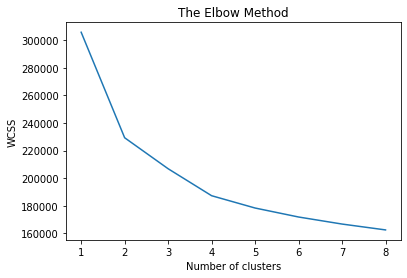

In [71]:
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [73]:
df2019Mid["Cluster"] = y_kmeans

C:\Users\katha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
df2019Mid

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
15366,158023,L. Messi,2019,Midfielder,1105000000,31,94,94,170.2,159,...,88,91,91,96,32,64,3,Left,CAM,3
15367,192985,K. De Bruyne,2019,Midfielder,93000000,27,91,91,180.3,154,...,77,86,92,87,61,78,2,Right,CAM,3
15368,183277,E. Hazard,2019,Midfielder,93000000,27,91,91,172.7,168,...,91,83,86,94,35,68,2,Right,CAM,3
15369,168542,David Silva,2019,Midfielder,60000000,32,90,90,172.7,148,...,67,75,88,91,52,58,2,Left,CAM,3
15370,211110,P. Dybala,2019,Midfielder,89000000,24,89,94,177.8,165,...,85,84,85,91,28,66,2,Left,CAM,3
15371,209331,M. Salah,2019,Midfielder,715000000,26,89,89,175.3,157,...,93,85,80,89,45,72,2,Left,CAM,3
15372,190460,C. Eriksen,2019,Midfielder,695000000,26,88,89,180.3,168,...,74,83,90,85,53,64,2,Right,CAM,3
15373,188350,M. Reus,2019,Midfielder,58000000,29,88,88,180.3,157,...,85,87,84,87,45,66,3,Right,CAM,3
15374,198710,J. Rodríguez,2019,Midfielder,54000000,26,87,87,180.3,165,...,68,86,88,86,50,67,3,Left,CAM,3
15375,198219,L. Insigne,2019,Midfielder,535000000,27,87,87,162.6,130,...,90,79,85,91,36,50,3,Right,CAM,3


In [75]:
# Player = L. Messi
df2019Mid[df2019Mid["ID"] == 158023]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
15366,158023,L. Messi,2019,Midfielder,1105000000,31,94,94,170.2,159,...,88,91,91,96,32,64,3,Left,CAM,3


In [76]:
r = int(df2019Mid[df2019Mid["ID"] == 158023]["Rating"])
c = int(df2019Mid[df2019Mid["ID"] == 158023]["Cluster"])
a = int(df2019Mid[df2019Mid["ID"] == 158023]["Age"])

In [77]:
df2019Mid[(df2019Mid["Cluster"] == c) & (r-5<df2019Mid["Rating"]) & (r+5>df2019Mid["Rating"]) & (df2019Mid["Age"]<a)]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
15367,192985,K. De Bruyne,2019,Midfielder,93000000,27,91,91,180.3,154,...,77,86,92,87,61,78,2,Right,CAM,3
15368,183277,E. Hazard,2019,Midfielder,93000000,27,91,91,172.7,168,...,91,83,86,94,35,68,2,Right,CAM,3


In [78]:
#Top players of each clusters

In [79]:
xdf2019Mid = df2019Mid[:]

xdf2019Mid.drop(xdf2019Mid[(xdf2019Mid["Cluster"] == 0) & (xdf2019Mid["Rating"] <= 63)].index,inplace = True)

xdf2019Mid.drop(xdf2019Mid[(xdf2019Mid["Cluster"] == 1) & (xdf2019Mid["Rating"] <= 74)].index,inplace = True)

xdf2019Mid.drop(xdf2019Mid[(xdf2019Mid["Cluster"] == 2) & (xdf2019Mid["Rating"] <= 74)].index,inplace = True)

xdf2019Mid.drop(xdf2019Mid[(xdf2019Mid["Cluster"] == 3) & (xdf2019Mid["Rating"] <= 84)].index,inplace = True)

C:\Users\katha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


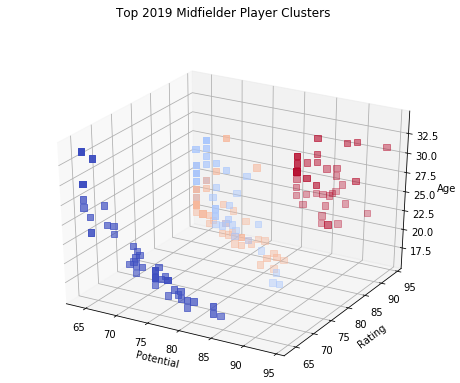

In [80]:
fig = plt.figure(1,figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xdf2019Mid.iloc[:,7], xdf2019Mid.iloc[:,6], xdf2019Mid.iloc[:,5], marker="s", c=xdf2019Mid["Cluster"], s=40, cmap = "coolwarm")

fig.suptitle("Top 2019 Midfielder Player Clusters")
ax.set_xlabel('Potential')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')

plt.show()
fig.savefig('fig.png')
#plt.savefig("figure.jpeg")

In [81]:
###############################################################################################################################

In [82]:
# Clustering player of Category = Forward

In [83]:
dff = df2019For[features]
dff1 = dff.iloc[:].values

In [84]:
dff1[0]

array([30, 89, 89, 172.7, 154, 88, 406, 70, 93, 77, 81, 397, 89, 73, 64,
       89, 432, 86, 78, 91, 401, 88, 76, 73, 83, 348, 65, 24, 93, 83, 62,
       30, 20, 59, 13, 15, 6, 11, 14, 2105, 438, 4, 4, 82, 89, 76, 89, 29,
       73, 1, 'Right', 'CF'], dtype=object)

In [85]:
labelencoder_dff = LabelEncoder()
dff1[:, 50] = labelencoder_dff.fit_transform(dff1[:, 50])

dff1[:, 51] = labelencoder_dff.fit_transform(dff1[:, 51])

onehotencoder = OneHotEncoder(categorical_features = [51])
dff1 = onehotencoder.fit_transform(dff1).toarray()

C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [86]:
dff1[0][4]

30.0

In [87]:
data1 = []
data2 = []
l = len(dff1)
for i in range(l):
    data1.append(dff1[i][0:4])
    data2.append(dff1[i][4:])
    
data1 = np.array(data1)
data2 = np.array(data2)

In [88]:
# Standardize the numerical valiables
sc = StandardScaler()
data3 = sc.fit_transform(data2)

In [89]:
data = np.concatenate((data1, data3), axis=1)

In [90]:
# Fit Kmeans for number of cluster 1:8 using Elbow Method

In [91]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

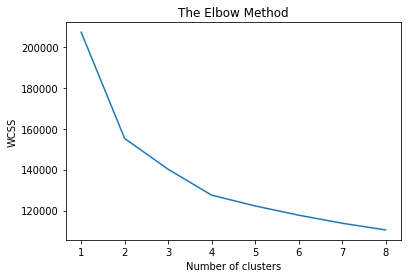

In [92]:
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [94]:
df2019For["Cluster"] = y_kmeans

C:\Users\katha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df2019For

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
33894,153079,S. Agüero,2019,Forward,645000000,30,89,89,172.7,154,...,82,89,76,89,29,73,1,Right,CF,2
33895,208722,S. Mané,2019,Forward,54000000,26,87,87,175.3,152,...,94,82,76,88,44,73,3,Right,CF,2
33896,200104,H. Son,2019,Forward,61000000,25,87,88,182.9,143,...,87,87,80,87,42,68,2,Right,CF,2
33897,201942,Roberto Firmino,2019,Forward,53000000,26,86,87,180.3,168,...,77,82,80,87,61,78,3,Right,CF,2
33898,211117,D. Alli,2019,Forward,515000000,22,85,90,188.0,176,...,75,81,80,82,71,78,2,Right,CF,2
33899,193301,A. Lacazette,2019,Forward,41000000,27,85,85,175.3,161,...,83,84,72,85,40,74,1,Right,CF,2
33900,216354,A. Kramarić,2019,Forward,275000000,27,83,83,177.8,161,...,75,85,73,86,30,71,3,Right,CF,2
33901,200610,K. Volland,2019,Forward,27000000,25,82,83,177.8,185,...,77,83,79,81,41,83,3,Left,CF,2
33902,204923,M. Sabitzer,2019,Forward,225000000,24,81,84,177.8,170,...,80,80,74,80,56,77,2,Right,CF,2
33903,187072,L. Stindl,2019,Forward,18000000,29,81,81,180.3,176,...,70,81,79,79,59,72,1,Right,CF,2


In [96]:
# Player = S. Agüero
df2019For[df2019For["ID"] == 153079]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
33894,153079,S. Agüero,2019,Forward,645000000,30,89,89,172.7,154,...,82,89,76,89,29,73,1,Right,CF,2


In [97]:
r = int(df2019For[df2019For["ID"] == 153079]["Rating"])
c = int(df2019For[df2019For["ID"] == 153079]["Cluster"])
a = int(df2019For[df2019For["ID"] == 153079]["Age"])

In [98]:
df2019For[(df2019For["Cluster"] == c) & (r-2<df2019For["Rating"]) & (r+2>df2019For["Rating"]) & (df2019For["Age"]<a)]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
65592,202126,H. Kane,2019,Forward,965000000,24,90,92,188.0,196,...,70,91,80,81,47,84,1,Right,ST,2
65593,188545,R. Lewandowski,2019,Forward,77000000,29,90,90,182.9,176,...,78,88,75,85,41,82,1,Right,ST,2
65595,188567,P. Aubameyang,2019,Forward,59000000,29,88,88,188.0,176,...,94,84,75,80,37,70,2,Right,ST,2
205500,194765,A. Griezmann,2019,Forward,71000000,27,89,89,175.3,161,...,86,86,83,88,57,72,2,Left,LW,2
229163,231747,K. Mbappé,2019,Forward,82000000,19,88,95,177.8,161,...,96,83,78,90,39,74,2,Right,RW,2


In [99]:
#Top players of each clusters

In [100]:
x = df2019For[:]

x.drop(x[(x["Cluster"] == 0) & (x["Rating"] <= 73)].index,inplace = True)

x.drop(x[(x["Cluster"] == 1) & (x["Rating"] <= 71)].index,inplace = True)

x.drop(x[(x["Cluster"] == 2) & (x["Rating"] <= 82)].index,inplace = True)

x.drop(x[(x["Cluster"] == 3) & (x["Rating"] <= 63)].index,inplace = True)

C:\Users\katha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


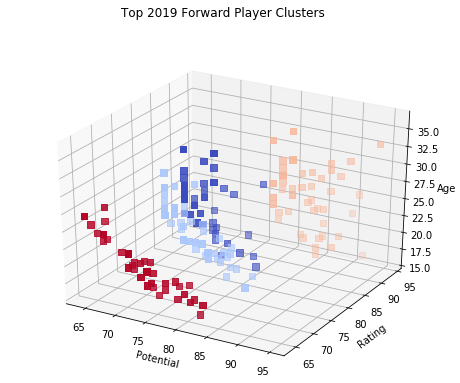

In [101]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x.iloc[:,7], x.iloc[:,6], x.iloc[:,5], marker="s", c=x["Cluster"], s=40, cmap = "coolwarm")

fig.suptitle("Top 2019 Forward Player Clusters")
ax.set_xlabel('Potential')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')

plt.show()
fig.savefig('4.png')

In [102]:
###############################################################################################################################

In [103]:
# Clustering player of Category = Defender

In [104]:
dff = df2019Def[features]
dff1 = dff.iloc[:].values

In [105]:
dff1[0]

array([32, 90, 90, 188.0, 172, 88, 315, 55, 42, 92, 79, 299, 53, 51, 70,
       76, 323, 64, 62, 85, 355, 67, 66, 88, 43, 327, 89, 88, 48, 50, 268,
       90, 89, 49, 6, 8, 15, 5, 15, 1936, 410, 3, 2, 63, 48, 65, 62, 89,
       83, 1, 'Right', 'CB'], dtype=object)

In [106]:
labelencoder_dff = LabelEncoder()
dff1[:, 50] = labelencoder_dff.fit_transform(dff1[:, 50])

dff1[:, 51] = labelencoder_dff.fit_transform(dff1[:, 51])

onehotencoder = OneHotEncoder(categorical_features = [51])
dff1 = onehotencoder.fit_transform(dff1).toarray()

C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [107]:
dff1[0][5]

32.0

In [108]:
data1 = []
data2 = []
l = len(dff1)
for i in range(l):
    data1.append(dff1[i][0:5])
    data2.append(dff1[i][5:])
    
data1 = np.array(data1)
data2 = np.array(data2)

In [109]:
# Standardize the numerical valiables
sc = StandardScaler()
data3 = sc.fit_transform(data2)

In [110]:
data = np.concatenate((data1, data3), axis=1)

In [111]:
# Fit Kmeans for number of cluster 1:8 using Elbow Method

In [112]:
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

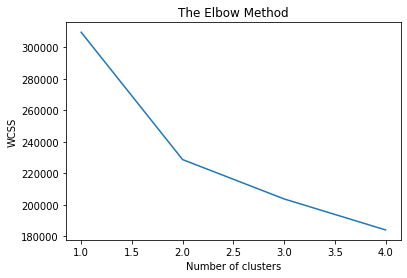

In [113]:
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [115]:
df2019Def["Cluster"] = y_kmeans

C:\Users\katha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
df2019Def

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
136055,182493,D. Godín,2019,Defender,44000000,32,90,90,188.0,172,...,63,48,65,62,89,83,1,Right,CB,0
136056,155862,Sergio Ramos,2019,Defender,44000000,32,90,90,182.9,181,...,75,67,75,73,89,85,1,Right,CB,0
136057,138956,G. Chiellini,2019,Defender,31000000,33,90,90,188.0,187,...,70,46,58,60,91,84,1,Left,CB,0
136058,203376,V. van Dijk,2019,Defender,67000000,26,89,91,193.0,203,...,77,60,69,71,89,86,1,Right,CB,0
136059,201024,K. Koulibaly,2019,Defender,58000000,27,88,90,188.0,196,...,73,27,51,65,88,87,1,Right,CB,0
136060,178603,M. Hummels,2019,Defender,46000000,29,88,88,190.5,203,...,52,58,76,71,90,76,1,Right,CB,0
136061,164240,Thiago Silva,2019,Defender,24000000,33,88,88,182.9,181,...,69,54,73,69,88,79,1,Right,CB,0
136062,152729,Piqué,2019,Defender,40000000,31,88,88,193.0,187,...,59,61,72,68,88,78,1,Right,CB,0
136063,205600,S. Umtiti,2019,Defender,57000000,24,87,92,182.9,165,...,72,64,71,72,87,81,1,Left,CB,0
136064,184087,T. Alderweireld,2019,Defender,39000000,29,87,87,185.4,179,...,64,57,73,66,89,79,1,Right,CB,0


In [117]:
# Player = Sergio Ramos
df2019Def[df2019Def["ID"] == 155862]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
136056,155862,Sergio Ramos,2019,Defender,44000000,32,90,90,182.9,181,...,75,67,75,73,89,85,1,Right,CB,0


In [118]:
r = int(df2019Def[df2019Def["ID"] == 155862]["Rating"])
c = int(df2019Def[df2019Def["ID"] == 155862]["Cluster"])
a = int(df2019Def[df2019Def["ID"] == 155862]["Age"])

In [119]:
df2019Def[(df2019Def["Cluster"] == c) & (r-2<df2019Def["Rating"]) & (r+3>df2019Def["Rating"]) & (df2019Def["Age"]<a)]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
136058,203376,V. van Dijk,2019,Defender,67000000,26,89,91,193.0,203,...,77,60,69,71,89,86,1,Right,CB,0


In [120]:
#Top players of each clusters

In [121]:
x = df2019Def[:]

x.drop(x[(x["Cluster"] == 0) & (x["Rating"] <= 82)].index,inplace = True)

x.drop(x[(x["Cluster"] == 1) & (x["Rating"] <= 72)].index,inplace = True)

C:\Users\katha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


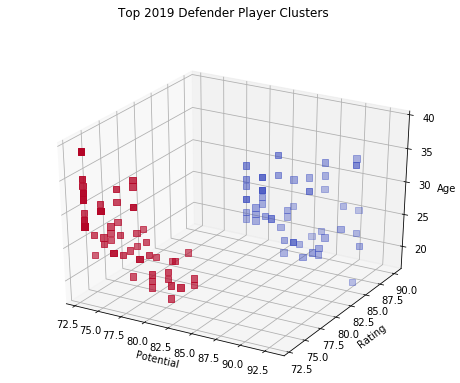

In [122]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x.iloc[:,7], x.iloc[:,6], x.iloc[:,5], marker="s", c=x["Cluster"], s=40, cmap = "coolwarm")

fig.suptitle("Top 2019 Defender Player Clusters")
ax.set_xlabel('Potential')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')

plt.show()
fig.savefig('5.png')

In [123]:
###############################################################################################################################

In [124]:
# Clustering player of Category = GoalKeeper

In [125]:
dff = df2019Goal[features]
dff1 = dff.iloc[:].values

In [126]:
dff1[0]

array([25, 91, 93, 188.0, 192, 89, 81, 13, 11, 15, 29, 81, 12, 14, 26, 16,
       307, 43, 60, 88, 229, 22, 41, 78, 12, 140, 34, 19, 11, 11, 57, 27,
       12, 435, 86, 92, 78, 90, 89, 1330, 487, 3, 1, 86, 92, 78, 89, 52,
       90, 1, 'Right', 'GK'], dtype=object)

In [127]:
labelencoder_dff = LabelEncoder()
dff1[:, 50] = labelencoder_dff.fit_transform(dff1[:, 50])

dff1[:, 51] = labelencoder_dff.fit_transform(dff1[:, 51])

onehotencoder = OneHotEncoder(categorical_features = [51])
dff1 = onehotencoder.fit_transform(dff1).toarray()

C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\katha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [128]:
dff1[0][1]

25.0

In [129]:
data1 = []
data2 = []
l = len(dff1)
for i in range(l):
    data1.append(dff1[i][0:1])
    data2.append(dff1[i][1:])
    
data1 = np.array(data1)
data2 = np.array(data2)

In [130]:
# Standardize the numerical valiables
sc = StandardScaler()
data3 = sc.fit_transform(data2)

In [131]:
data = np.concatenate((data1, data3), axis=1)

In [132]:
# Fit Kmeans for number of cluster 1:8 using Elbow Method

In [133]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

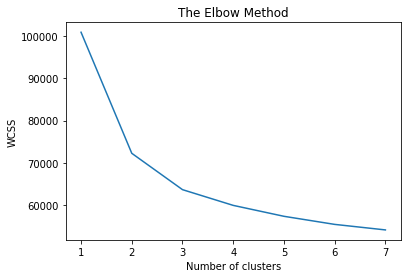

In [134]:
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [136]:
df2019Goal["Cluster"] = y_kmeans

C:\Users\katha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
df2019Goal

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
92084,200389,J. Oblak,2019,GoalKeeper,755000000,25,91,93,188.0,192,...,86,92,78,89,52,90,1,Right,GK,0
92085,193080,De Gea,2019,GoalKeeper,625000000,27,90,92,193.0,181,...,90,84,83,93,58,86,1,Right,GK,0
92086,192448,M. ter Stegen,2019,GoalKeeper,58000000,26,89,92,188.0,187,...,88,85,88,90,45,87,1,Right,GK,0
92087,192119,T. Courtois,2019,GoalKeeper,475000000,26,88,89,198.1,212,...,84,89,72,87,49,85,1,Left,GK,0
92088,167948,H. Lloris,2019,GoalKeeper,36000000,31,88,88,188.0,181,...,88,84,68,92,63,83,1,Left,GK,0
92089,167495,M. Neuer,2019,GoalKeeper,34000000,32,88,88,193.0,203,...,88,86,90,87,57,85,1,Right,GK,0
92090,162835,S. Handanovič,2019,GoalKeeper,30000000,33,88,88,193.0,203,...,87,86,69,89,53,89,1,Right,GK,0
92091,212831,Alisson,2019,GoalKeeper,46000000,25,87,91,190.5,201,...,84,82,87,89,49,87,1,Right,GK,0
92092,193041,K. Navas,2019,GoalKeeper,305000000,31,87,87,185.4,176,...,90,81,75,90,53,82,1,Right,GK,0
92093,210257,Ederson,2019,GoalKeeper,415000000,24,86,90,188.0,190,...,85,80,92,87,63,82,1,Left,GK,0


In [138]:
# Player = H. Lloris
df2019Goal[df2019Goal["ID"] == 167948]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
92088,167948,H. Lloris,2019,GoalKeeper,36000000,31,88,88,188.0,181,...,88,84,68,92,63,83,1,Left,GK,0


In [139]:
r = int(df2019Goal[df2019Goal["ID"] == 167948]["Rating"])
c = int(df2019Goal[df2019Goal["ID"] == 167948]["Cluster"])
a = int(df2019Goal[df2019Goal["ID"] == 167948]["Age"])

In [140]:
df2019Goal[(df2019Goal["Cluster"] == c) & (r-2<df2019Goal["Rating"]) & (r+3>df2019Goal["Rating"]) & (df2019Goal["Age"]<a)]

,ID,Name,Year,Category,Value,Age,Rating,Potential,Height,Weight,...,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Foot,Best Position,Cluster
92085,193080,De Gea,2019,GoalKeeper,625000000,27,90,92,193.0,181,...,90,84,83,93,58,86,1,Right,GK,0
92086,192448,M. ter Stegen,2019,GoalKeeper,58000000,26,89,92,188.0,187,...,88,85,88,90,45,87,1,Right,GK,0
92087,192119,T. Courtois,2019,GoalKeeper,475000000,26,88,89,198.1,212,...,84,89,72,87,49,85,1,Left,GK,0
92091,212831,Alisson,2019,GoalKeeper,46000000,25,87,91,190.5,201,...,84,82,87,89,49,87,1,Right,GK,0


In [141]:
#Top players of each clusters

In [142]:
x = df2019Goal[:]

x.drop(x[(x["Cluster"] == 0) & (x["Rating"] <= 81)].index,inplace = True)

x.drop(x[(x["Cluster"] == 1) & (x["Rating"] <= 64)].index,inplace = True)

x.drop(x[(x["Cluster"] == 3) & (x["Rating"] <= 69)].index,inplace = True)

C:\Users\katha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


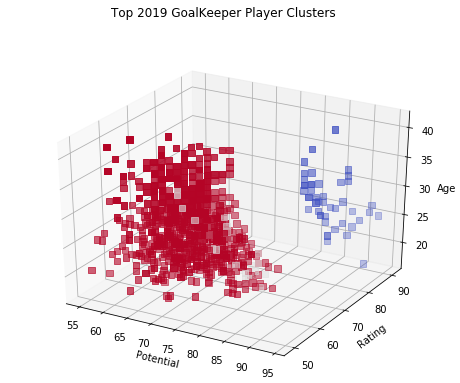

In [143]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x.iloc[:,7], x.iloc[:,6], x.iloc[:,5], marker="s", c=x["Cluster"], s=40, cmap = "coolwarm")

fig.suptitle("Top 2019 GoalKeeper Player Clusters")
ax.set_xlabel('Potential')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')

plt.show()

fig.savefig('6.png')